### Import custom modules from current folder

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import nltk
from text_easability_metrics import TextEasabilityMetrics, StanfordNLP
from simple_text_representation.classes import Text
from simple_text_representation.models import Database
from nltk.tree import Tree
# from nltk.draw.tree import draw_trees

In [3]:
database = Database('educationalTexts', 'postgres', '', '0.0.0.0', 5432)
path = r'/Users/herbert/Projects/Tesis/stanford-corenlp-full-2017-06-09'
path = r'http://corenlp.run'
path = r'http://localhost/'

In [4]:
metrics = TextEasabilityMetrics(path, port=9000)

TextEasabilityMetrics


In [5]:
firstTestText = Text.getText(database, 1)

##### StanfordNLP test

In [6]:
stanfordNLP = StanfordNLP(language='es')

### Text easability analysis

In [7]:
firstTestText

[['Si bien los trasplantes se han convertido en una práctica habitual, aún persisten fuertes temores en la población para donar órganos, lograr su superación es la clave para aumentar el número de los donadores solidarios que hacen falta para salvar miles de vidas.'],
 ['Es preciso, entonces, que se aclaren algunas dudas para que las personas pierdan el miedo a donar.',
  ' Primero, que lo complicado de los procedimientos de extirpación y trasplantación, en el que intervienen varios equipos médicos altamente especializados, vuelve muy difícil la existencia de mafias.',
  ' Segundo, que la necesaria compatibilidad (afinidad de grupo sanguíneo) entre donante y receptor dificulta la posibilidad de muertes “a pedido”.'],
 ['La última cuestión es la más compleja; en la actualidad, aunque alguien haya manifestado expresamente su voluntad de donar, es a la familia a la que se consulta en el momento en que la donación puede efectuarse.',
  ' Como se entiende, tal consulta llega en un momento d

In [8]:
# testSentence = 'Si bien los trasplantes se han convertido en una práctica habitual, aún persisten fuertes temores en la población para donar órganos, lograr su superación es la clave para aumentar el número de los donadores solidarios que hacen falta para salvar miles de vidas.'
testSentence = firstTestText[0][0]
testSentence

# corpus = nltk.corpus.conll2002
# sentenceGrammar = corpus.chunked_sents('esp.train')[2]
# sentence= corpus.sents('esp.train')[2]

# parser = nltk.ChartParser(sentenceGrammar)
# for doc in parser.parse(sentence):
#     print(doc)


'Si bien los trasplantes se han convertido en una práctica habitual, aún persisten fuertes temores en la población para donar órganos, lograr su superación es la clave para aumentar el número de los donadores solidarios que hacen falta para salvar miles de vidas.'

In [9]:
# parseSentence = metrics.syntaxisSimplicity(testSentence)
# parseSentence

In [10]:
treeTest = stanfordNLP.parse(testSentence)

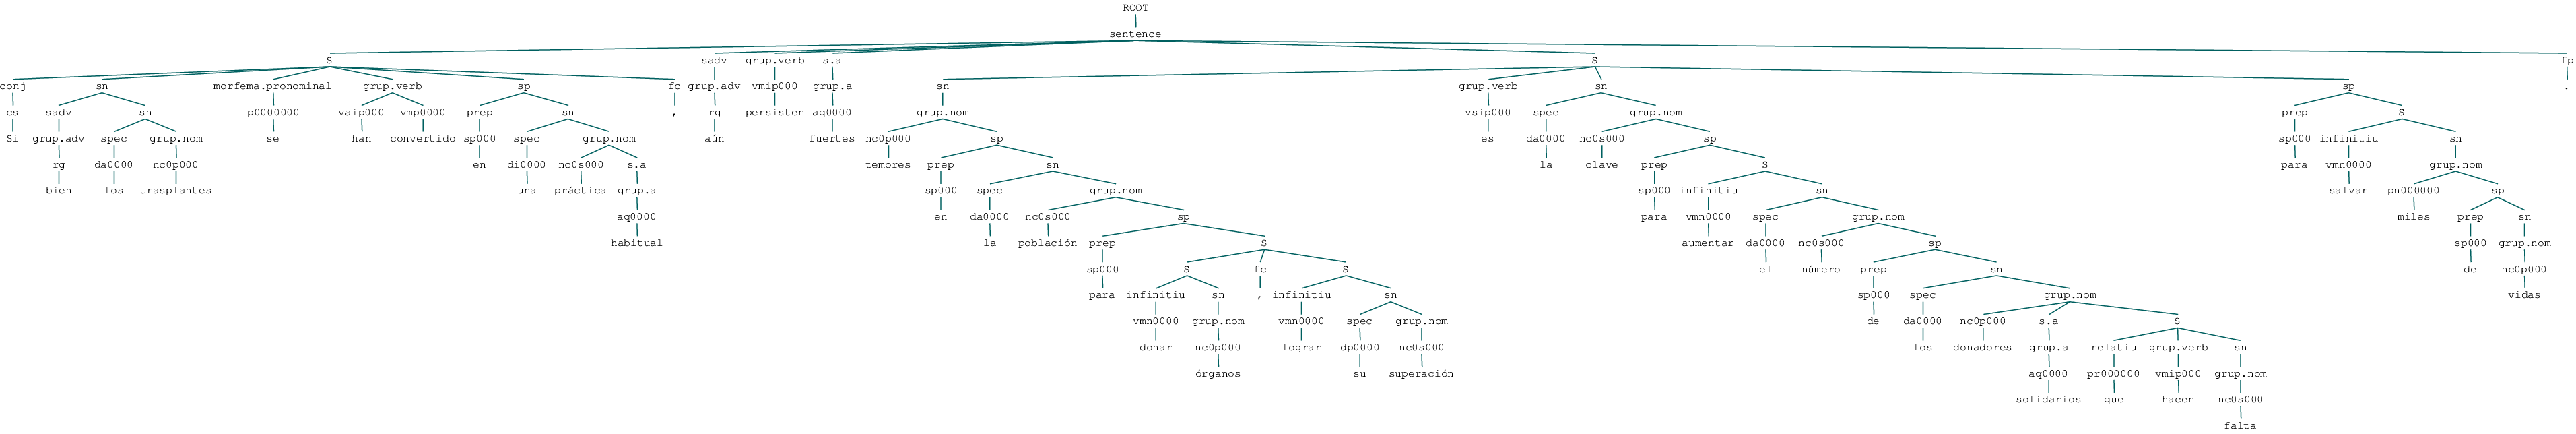

In [11]:
tree = Tree.fromstring(treeTest)
tree

In [12]:
text = firstTestText
treeArr = list()

for paragraph in text:
    for sentence in paragraph:
        parseS = stanfordNLP.parse(sentence)
        treeP = Tree.fromstring(parseS)
        treeArr.append(treeP)

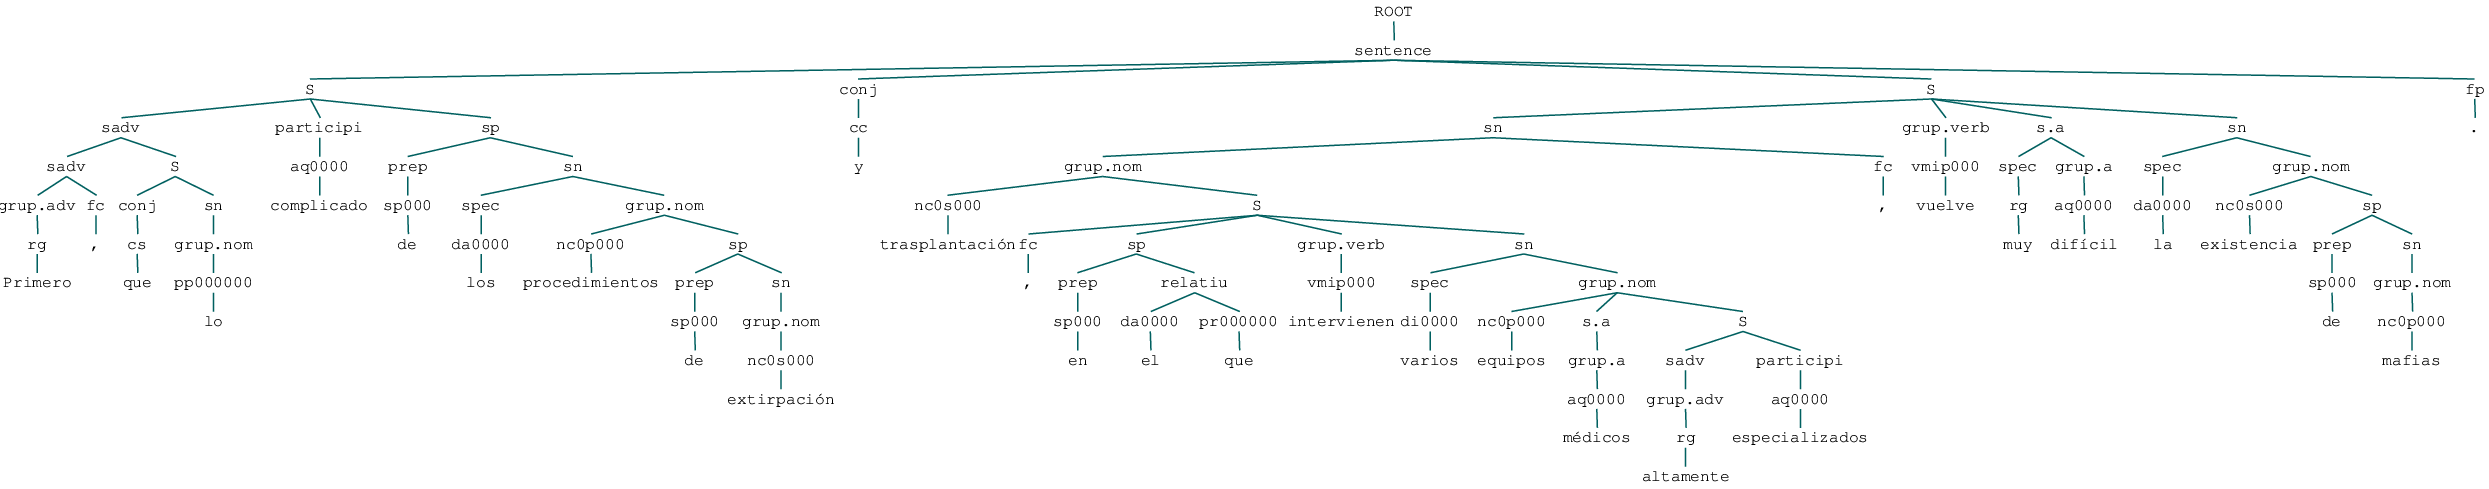

In [13]:
treeArr[2]

In [14]:
def isSpecialChar(leave):
    return not leave.isalnum()

In [15]:
def getMainVerbRecursive(treePP, currentDeep, wordsCount, isMainVerbFound):
    wordsCountPP = wordsCount

    if(isinstance(treePP, Tree) and len(treePP) == 1) and treePP.height() == 2 and not isMainVerbFound:
#         print(treePP)
#         print(currentDeep)
        verbFound = treePP.label().startswith("v")
        wordsCountPP = wordsCountPP + (1 if not verbFound else 0)

        return currentDeep, wordsCountPP, verbFound
    else:
        partialDeep = 10000
        for index in range(len(treePP)):
            subTreeP = treePP[index]
            deepPP, wordsCountPP, mainVerFound = getMainVerbRecursive(subTreeP, currentDeep + 1, wordsCountPP, isMainVerbFound);
            if (mainVerFound and deepPP < partialDeep): partialDeep = deepPP
        return partialDeep, wordsCountPP, mainVerFound

    return currentDeep, wordsCount, isMainVerbFound

In [16]:
def getMainVerb(treeParam):
    currentDeep = 10000
    numOfWords = 0
    indexFound  = -1
    arrOfNumWords = list()
    
    for j in range(len(treeParam)):
        print('-------------------------------------------------------------------------------------')
        print(j)
        print(treeParam[j])
        print('leaves', len(treeParam[j].leaves()))
        isFound = False
        newDeep, numWordsBefore, isFound = getMainVerbRecursive(treeParam[j], 1, 0, isFound)

        if (not isFound):
            numWordsBefore = len([leave for leave in treeParam[j].leaves() if not isSpecialChar(leave)])

        arrOfNumWords.append(numWordsBefore)

        if (isFound and newDeep < currentDeep):
            indexFound = j
            currentDeep = newDeep

        print(isFound, numWordsBefore, newDeep, currentDeep, indexFound)
        print('====================================================================================')

    print(arrOfNumWords, indexFound)
    numOfWords =  sum(arrOfNumWords[:indexFound]) if indexFound >= 0 else sum(arrOfNumWords)
    return numOfWords

In [ ]:
firstTestText
testSentence = firstTestText[0][0]

metrics.syntaxisSimplicity(testSentence)

# for index in range(len(treeTT)):
#     subTT = treeTT[index]
#     print(len(subTT))
#     print(subTT.pos())
#     print(isinstance(subTT[0], Tree))

#     print('---------------------------------------------------------------------------------------------------------')

### Word Concreteness

In [ ]:

from nltk.corpus import wordnet
wordnet.synsets('mesa', lang='spa')